In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#load data from csv file
def load_Stroke_data():
    return pd.read_csv("healthcare-dataset-stroke-data.csv")

In [2]:
stroke = load_Stroke_data()
df= pd.DataFrame(data=stroke)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df = df.drop(columns="id")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.describe(include=["float64","int64"])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.shape

(5110, 11)

In [8]:
df.columns.values.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [10]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [12]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
#remove noisy data
df = df[df['gender'] != 'Other']
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

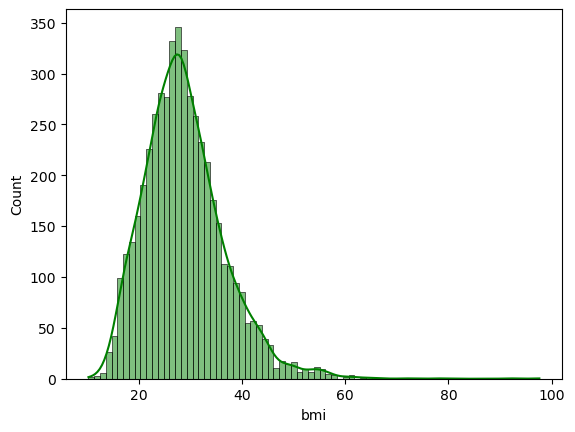

In [15]:
sns.histplot(data=df["bmi"], kde=True, color="green")
plt.show()
#positively skewed

In [16]:
# we will take the median to fill the null cells in bmi. because central tendancy is positively skewed
bmi_median = df.describe().loc['50%']['bmi']
df = df.fillna({"bmi": bmi_median})
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

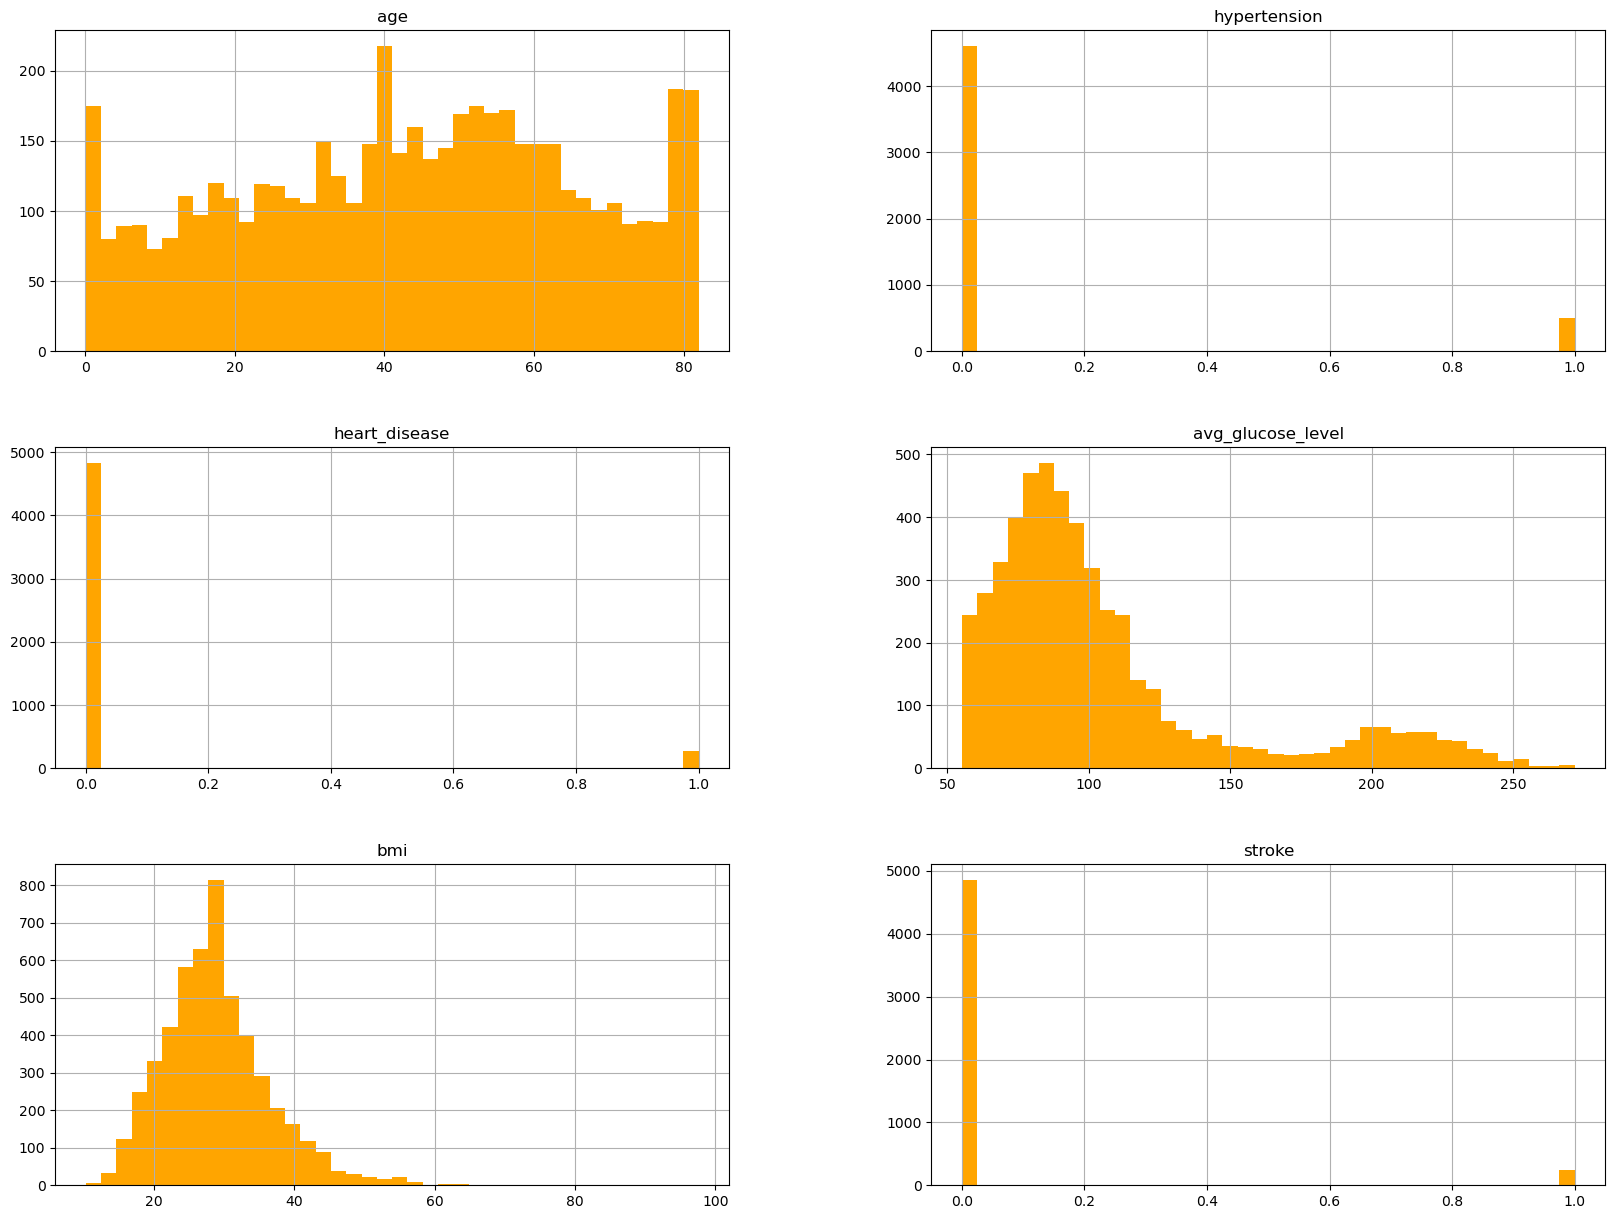

In [17]:
# a hishtogram of each feature
df.hist(bins=40, figsize=(20,15), color="orange")
plt.show()

In [18]:
df.columns.values.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

object_list = df.select_dtypes(include=['object']).columns.values.tolist()
for x in object_list:
    df[x]= label_encoder.fit_transform(df[x])


In [20]:
df["smoking_status"].value_counts()

2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64

In [21]:
df["gender"].value_counts()

0    2994
1    2115
Name: gender, dtype: int64

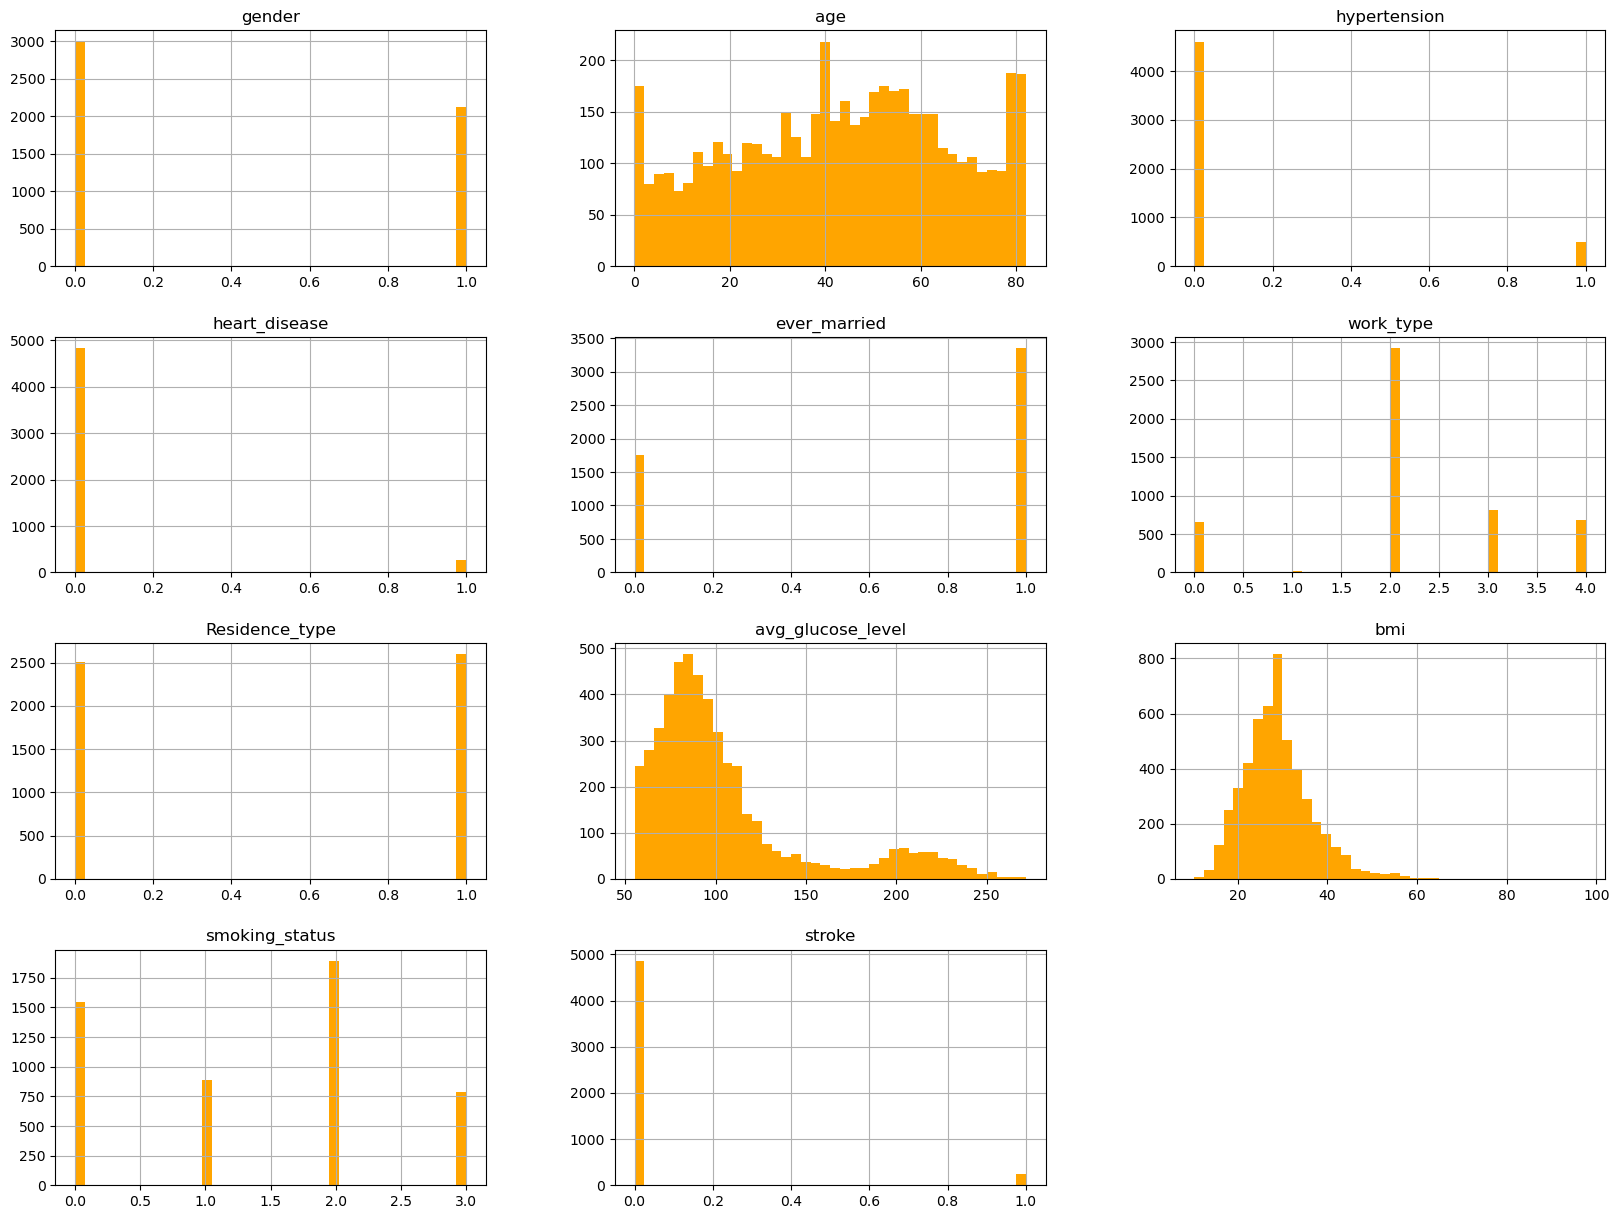

In [22]:
# a hishtogram of each feature
df.hist(bins=40, figsize=(20,15), color="orange")
plt.show()

In [23]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054722,-0.026452,-0.062423,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.238323,0.324211,0.265165,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.174540,0.158252,0.111018,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.161907,0.036879,0.048445,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.155329,0.334770,0.259604,0.108299
work_type,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.050492,-0.299218,-0.305942,-0.032323
Residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.004783,-0.000444,0.008168,0.015415
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,-0.050492,-0.004783,1.000000,0.167033,0.063498,0.131991
bmi,-0.026452,0.324211,0.158252,0.036879,0.334770,-0.299218,-0.000444,0.167033,1.000000,0.218928,0.036075
smoking_status,-0.062423,0.265165,0.111018,0.048445,0.259604,-0.305942,0.008168,0.063498,0.218928,1.000000,0.028108
